In [1]:
import cv2
import matplotlib.pyplot as plt
import random
import math
import numpy as np

img = cv2.imread('./assets/venkat-goat-downsize.jpg')
img = cv2.resize(img, (256, 256))

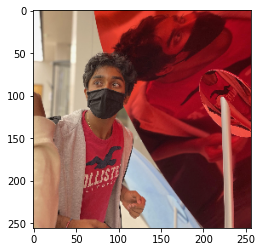

In [2]:
%matplotlib inline

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [3]:
def generate_random_pixel(img: np.ndarray) -> tuple:
    y, x, _ = img.shape
    
    i = random.randint(0, y-1)
    j = random.randint(0, x-1)
    
    # print(f'img[{i}][{j}] - {img[i][j]}')
    
    return img[i][j]

def get_pixel_avg(pixels: list) -> list:
    sum = [0, 0, 0]
    length = len(pixels)
    
    for pixel in pixels:
        pixel = list(pixel[0])
        sum[0] += pixel[0]
        sum[1] += pixel[1]
        sum[2] += pixel[2]
    
    # print(sum)
    avg_pixel = [int(sum[0]/length), int(sum[1]/length), int(sum[2]/length)]
    
    return avg_pixel

def euclidian_distance(p1: list, p2: list) -> float:
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2 + (p1[2] - p2[2])**2)

def pixel_to_str(pixel_in: list) -> str:
    pixel = list(pixel_in)
    for i in range(len(pixel)):
        pixel[i] = str(pixel[i])
    
    return '-'.join(pixel)

def str_to_pixel(pixel_str: str) -> list:
    pixel = pixel_str.split('-')
    
    return [int(pix) for pix in pixel]

def generate_pixel_hash(k: int, img: np.ndarray) -> tuple:
    pixel_hash = {}
    pixels = set()
    while len(pixels) < k:
        rand_pixel = pixel_to_str(generate_random_pixel(img))
        pixel_hash.update({rand_pixel: []})
        pixels.add(rand_pixel)
    
    return (pixel_hash, list(pixels))

def sort_pixels(img_in: np.ndarray, pixel_hash_in: dict) -> dict:
    img = img_in
    pixel_hash = pixel_hash_in
    
    for i in range(len(img)):
        for j in range(len(img[i])):
            img_pixel = img[i][j]
            
            lowest_dist = float('inf')
            closest_pixel = None
            for key, _ in pixel_hash.items():
                dist = euclidian_distance(str_to_pixel(key), img_pixel)
                
                if dist < lowest_dist:
                    lowest_dist = dist
                    closest_pixel = key
            
            arr = pixel_hash[closest_pixel]
            arr.append([img_pixel, (i, j)])
            pixel_hash[closest_pixel] = arr
    
    return pixel_hash

def assign_sorted_pixels(img_in: np.ndarray, pixel_hash_in: dict) -> tuple:
    img = img_in
    pixel_hash = pixel_hash_in
    prev_pixel_hash = pixel_hash_in
    for key, value in pixel_hash.items():
        for i in range(len(value)):
            pixel = value[i][0]
            coords = value[i][1]

            img[coords[0]][coords[1]] = str_to_pixel(key)
    
    return img, prev_pixel_hash

def subtract_arrs(c1, c2):
    diffs = []
    for i in range(len(c1)):
        diffs.append(c2[i] - c1[i])
    
    return diffs

In [11]:
def K_Means(img: np.ndarray, k: int) -> np.ndarray:
    diff_sum = float('inf')
    prev_pixel_cats = [0 for i in range(k)]
    
    pixel_hash, pixel_list = generate_pixel_hash(k, img)
    pixel_hash = sort_pixels(img, pixel_hash)

    new_img = assign_sorted_pixels(img, pixel_hash)

    curr_pixel_cats = [len(value) for key, value in pixel_hash.items()]

    # NEED TO KEEP TRACK OF PIXEL HASH ORDER (maybe make it a list instead of a hashmap)
    # diff_sum will change if order isnt tracked
    
    return new_img

In [26]:
final_img = K_Means(img.copy(), 5)
print(final_img[0])

18470
7042
10013
16197
13814
[[[204 225 242]
  [204 225 242]
  [204 225 242]
  ...
  [ 32  18 176]
  [ 32  18 176]
  [ 32  18 176]]

 [[204 225 242]
  [204 225 242]
  [204 225 242]
  ...
  [ 32  18 176]
  [ 32  18 176]
  [ 32  18 176]]

 [[204 225 242]
  [204 225 242]
  [204 225 242]
  ...
  [ 32  18 176]
  [ 32  18 176]
  [ 32  18 176]]

 ...

 [[114 145 170]
  [114 145 170]
  [114 145 170]
  ...
  [ 20  15  54]
  [ 20  15  54]
  [ 20  15  54]]

 [[114 145 170]
  [114 145 170]
  [114 145 170]
  ...
  [ 20  15  54]
  [ 20  15  54]
  [ 20  15  54]]

 [[114 145 170]
  [114 145 170]
  [114 145 170]
  ...
  [ 20  15  54]
  [ 20  15  54]
  [ 20  15  54]]]


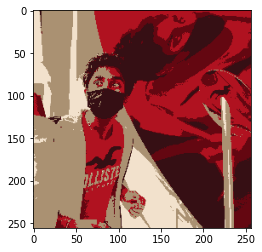

In [27]:
%matplotlib inline

plt.imshow(cv2.cvtColor(final_img[0], cv2.COLOR_BGR2RGB))
plt.show()

In [28]:
cv2.imwrite('./clustered_images/k5/venky.png', final_img[0])

True

In [ ]:
# this implementation for K-Means doesn't work and im too lazy to debug so im gonna rewrite it
'''def K_Means(img: np.ndarray, num_shades: int) -> np.ndarray:
    diff_sum = float('inf')
    prev_cats = [0 for i in range(num_shades)]
    
    pixels = set()
    pixel_hash = {}
    while (len(list(pixel_hash.items())) < num_shades):
        rand_pixel = list(generate_random_pixel(img))

        for k in range(len(rand_pixel)):
            rand_pixel[k] = str(rand_pixel[k])
        
        str_rand_pixel = '-'.join(rand_pixel)
        pixels.add(str_rand_pixel)
        pixel_hash.update({str_rand_pixel: []})
    
    pixels = list(pixels)
    for key, value in pixel_hash.items():
        print(key, type(key))
    print()
    print()
    
    while diff_sum > 0:
        for i in range(len(img)):
            for j in range(len(img[i])):
                min_dist = float('inf')
                closest_pixel = None
                for pixel in pixels:
                    euc_dist = euclidian_distance(pixel, list(img[i][j]))
                    if euc_dist < min_dist:
                        min_dist = euc_dist
                        closest_pixel = pixel
                        
                arr = pixel_hash[closest_pixel]
                arr.append([list(img[i][j]), (i, j)])
                pixel_hash[closest_pixel] = arr
        
        for key, value in pixel_hash.items():
            for pixel_loc_pair in value:
                loc = pixel_loc_pair[1]
                p = key.split('-')
                pixel_val = [int(val) for val in p]
                
                img[loc[0]][loc[1]] = pixel_val
        
        curr_cats = [len(value) for key, value in pixel_hash.items()]
        
        diffs = [curr_cats[i] - prev_cats[i] for i in range(len(curr_cats))]
        diff_sum = sum(diffs)
        
        new_key_hash = {}
        print(len(pixel_hash.items()))
        for key, value in pixel_hash.items():
            if len(value) == 0:
                avg_pixel = generate_random_pixel(img)
                continue
                
            avg_pixel = get_pixel_avg(value)
            
            for i in range(len(avg_pixel)):
                avg_pixel[i] = str(avg_pixel[i])
            
            avg_pixel_str = '-'.join(avg_pixel)
            new_key_hash.update({avg_pixel_str: []})
        
        pixel_hash = new_key_hash
        
        new_pixel_list = []
        for key, _ in pixel_hash.items():
            new_pixel_list.append(key)
        
        pixels = new_pixel_list
        
        prev_cats = curr_cats
    
    return img'''